In [1]:
import pandas as pd
# Use read_csv from pandas to read the file for proceesing
# Read the pima-indians-diabetes.csv dataset into a dataframe say df
df = pd.read_csv(r"C:\Users\HP\Downloads\datamind-main\Datasets/pima-indians-diabetes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.columns = ['pregnantcount','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','BMI','Diabetes pedigree function','Age','isdiabetic']
print('First 2 Records')
print(df.head(2),end = '\n\n\n')
print('Check if there are any columns with empty/null dataset ?')
print(df.isnull().sum())
print(end = '\n\n\n')
print('correlation between all predative features w.r.t "HasDiabetes" (target) feature')
cor = df.corr()['isdiabetic']
print(cor)
print(end = '\n\n\n')
print('find 3 most correlated features to target variable')
cor_target = abs(cor)
relevant_features = cor_target[cor_target>0.29]
print(relevant_features)
print(end = '\n\n\n')

First 2 Records
   pregnantcount  Plasma glucose concentration  Diastolic blood pressure  \
0              6                           148                        72   
1              1                            85                        66   

   Triceps skin fold thickness  2-Hour serum insulin   BMI  \
0                           35                     0  33.6   
1                           29                     0  26.6   

   Diabetes pedigree function  Age  isdiabetic  
0                       0.627   50           1  
1                       0.351   31           0  


Check if there are any columns with empty/null dataset ?
pregnantcount                   0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
BMI                             0
Diabetes pedigree function      0
Age                             0
isdiabetic                      0
dtype: int64



correlation between all predative featur

heatmap of the correlation matrix 


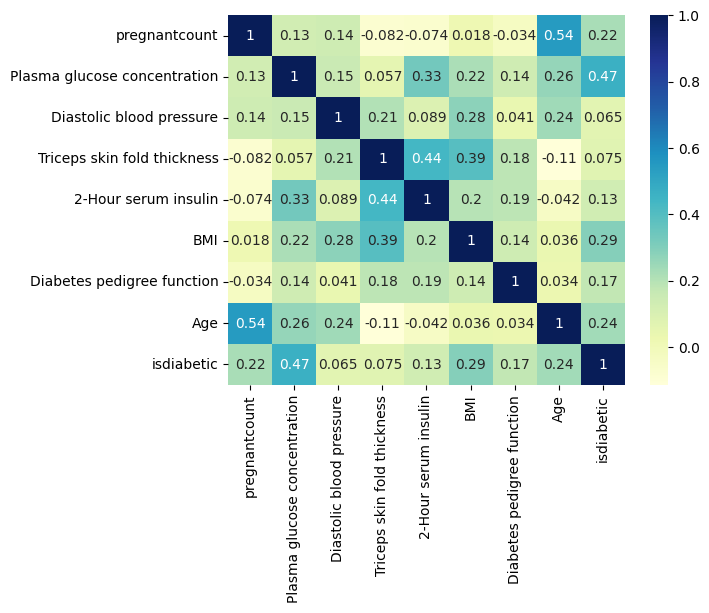

In [3]:
print('heatmap of the correlation matrix ')
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [4]:
print(df.isin([0]).any())
print(end = '\n\n\n')
print('BMI', df['BMI'].median())
print(end = '\n\n\n')
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['Plasma glucose concentration']=df['Plasma glucose concentration'].replace(0,df['Plasma glucose concentration'].median())
df['Diastolic blood pressure']=df['Diastolic blood pressure'].replace(0,df['Diastolic blood pressure'].median())
df['Triceps skin fold thickness']=df['Triceps skin fold thickness'].replace(0,df['Triceps skin fold thickness'].median())
df['2-Hour serum insulin']=df['2-Hour serum insulin'].replace(0,df['2-Hour serum insulin'].median())
df.isin([0]).any()

pregnantcount                    True
Plasma glucose concentration     True
Diastolic blood pressure         True
Triceps skin fold thickness      True
2-Hour serum insulin             True
BMI                              True
Diabetes pedigree function      False
Age                             False
isdiabetic                       True
dtype: bool



BMI 32.0





pregnantcount                    True
Plasma glucose concentration    False
Diastolic blood pressure        False
Triceps skin fold thickness     False
2-Hour serum insulin            False
BMI                             False
Diabetes pedigree function      False
Age                             False
isdiabetic                       True
dtype: bool

In [5]:
pd.options.mode.chained_assignment = None
numeric_feature_names = ['pregnantcount','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','BMI','Diabetes pedigree function','Age']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df[numeric_feature_names])
df[numeric_feature_names] = ss.transform(df[numeric_feature_names])
print(df)

     pregnantcount  Plasma glucose concentration  Diastolic blood pressure  \
0         0.639947                      0.866045                 -0.031990   
1        -0.844885                     -1.205066                 -0.528319   
2         1.233880                      2.016662                 -0.693761   
3        -0.844885                     -1.073567                 -0.528319   
4        -1.141852                      0.504422                 -2.679076   
..             ...                           ...                       ...   
763       1.827813                     -0.679069                  0.298896   
764      -0.547919                      0.011301                 -0.197433   
765       0.342981                     -0.021574                 -0.031990   
766      -0.844885                      0.142800                 -1.024647   
767      -0.844885                     -0.942068                 -0.197433   

     Triceps skin fold thickness  2-Hour serum insulin       BM

In [6]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [7]:
import warnings
warnings.filterwarnings("ignore")
X = df.drop('isdiabetic', axis=1)
y = df['isdiabetic']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('ADA',AdaBoostClassifier(n_estimators=100)))
validation_size = 0.2
seed = 0
scoring = 'accuracy'
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10)
   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.780041 (0.050886)
LDA: 0.777143 (0.053872)
KNN: 0.765549 (0.044372)
CART: 0.720704 (0.050157)
NB: 0.756853 (0.038892)
SVM: 0.759772 (0.042565)
RF: 0.775735 (0.030837)
ADA: 0.761222 (0.046356)


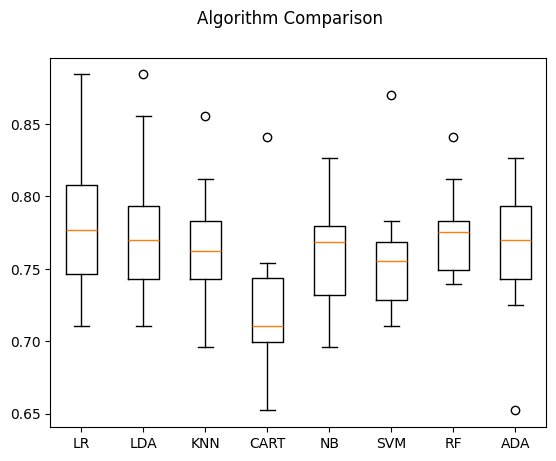

In [9]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score
results_auc = []
results_cm = {}
for name, model in models:
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   cm = confusion_matrix(y_test, y_pred)
   results_cm[name] = cm
   try:
       auc = roc_auc_score(y_test, y_pred)
       results_auc.append((name, auc))
   except ValueError:
       results_auc.append((name, "N/A"))
print("Confusion Matrices:")
for name, cm in results_cm.items():
   print(f"\n{name}:\n{cm}")
print("\nAUC - ROC Scores:")
for name, auc in results_auc:
   print(f"{name}: {auc}")

Confusion Matrices:

LR:
[[44  4]
 [19 10]]

LDA:
[[44  4]
 [21  8]]

KNN:
[[36 12]
 [18 11]]

CART:
[[41  7]
 [14 15]]

NB:
[[40  8]
 [18 11]]

SVM:
[[41  7]
 [18 11]]

RF:
[[38 10]
 [14 15]]

ADA:
[[39  9]
 [14 15]]

AUC - ROC Scores:
LR: 0.6307471264367817
LDA: 0.5962643678160919
KNN: 0.5646551724137931
CART: 0.6857040229885057
NB: 0.6063218390804599
SVM: 0.6167385057471264
RF: 0.6544540229885057
ADA: 0.6648706896551724
